In [1]:
import csv
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

from shared.plot import plot_geodesic, plot_hierarchy, plot_train_embed,\
    get_dict_data
from shared.io import read_data, read_ref
from shared.math import eval_reconstruction
from train import init_torch_objects, train

OUT_DIMENSIONS = 3 # 50
NEG_SAMPLES = 10 # 10
EPOCH = 2000
DEVICE = "cpu" # or "cpu"
torch.set_default_dtype(torch.float64)

In [2]:
# Plot geodesic comparison between Poincaré and Euclidean
# plot_geodesic()

In [6]:
# Load edge data
data_path = Path("data","opehr_concepts.csv")
data, weights, objects, neighbors, diff_summed, num_relations = read_data(data_path)

# load concept reference
ref_path = Path('data','ref.csv')
ref = read_ref(ref_path)

clinical_finding_concept_id = 441840
fixed_index = objects.index(clinical_finding_concept_id)

# initialize torch objects for the training loop
model, optimizer, loss_func = init_torch_objects(objects, OUT_DIMENSIONS, fixed_index)

if "cuda:1" == DEVICE:
    model = model.to(DEVICE)

# ToDo: implement function to load embedding and continue training


# ensure that ref contains all concepts
dict_data = dict(enumerate(objects))
for key, value in dict_data.items():
    try:
        dict_data[key] = ref.loc[ref['concept_id'] == value].concept_name.values[0]
    except Exception as e:
        print(f"Error at Key={key}, Value={value}, Error={e}")

print(weights)

Processing dataset...
Edges: 27028
Relations: 27028
Nodes: 27035
[1.2764541e-03 1.8499333e-05 1.4799467e-04 ... 1.8499333e-05 1.8499333e-05
 1.8499333e-05]


dictData[1]: 35625043


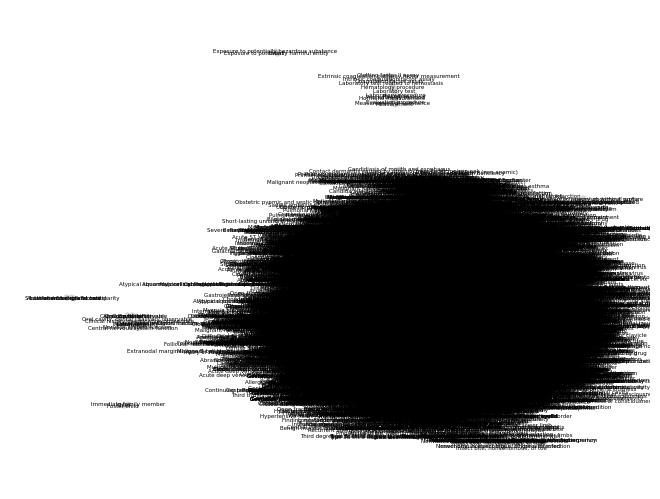

In [7]:
# plot_hierarchy(data, objects, ref, True)

In [8]:
train(data=data, weights=weights, objects=objects, neighbors=neighbors,
      diff_summed=diff_summed, num_relations=num_relations,
      model=model, optimizer=optimizer, loss_func=loss_func,
      out_dimensions=OUT_DIMENSIONS, n_neg_samples=NEG_SAMPLES, n_epochs=EPOCH,
      n_burn_in=10, device=DEVICE)

Epoch: 0
Evaluating mean rank:


100%|██████████| 27035/27035 [01:40<00:00, 269.46it/s]



Mean rank: 8340.659427260618, loss: 2.396772044930424
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Evaluating mean rank:


100%|██████████| 27035/27035 [01:59<00:00, 225.88it/s]



Mean rank: 1979.752996892112, loss: 11.938977570613819
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Evaluating mean rank:


100%|██████████| 27035/27035 [02:06<00:00, 213.03it/s]



Mean rank: 5970.834541956489, loss: 11.874091239739952
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Evaluating mean rank:


100%|██████████| 27035/27035 [02:25<00:00, 185.35it/s]



Mean rank: 827.8754994820187, loss: 10.614529725006955
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Evaluating mean rank:


100%|██████████| 27035/27035 [02:44<00:00, 164.57it/s]



Mean rank: 630.8851191357111, loss: 8.38473330192151
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Evaluating mean rank:


100%|██████████| 27035/27035 [02:29<00:00, 180.37it/s]



Mean rank: 592.6006733757584, loss: 6.505729359636876
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.75it/s]



Mean rank: 580.6925410685216, loss: 5.051361431993545
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Evaluating mean rank:


100%|██████████| 27035/27035 [01:57<00:00, 230.68it/s]



Mean rank: 573.4094642592867, loss: 3.9906074650779506
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Evaluating mean rank:


100%|██████████| 27035/27035 [02:16<00:00, 197.85it/s]



Mean rank: 568.8836021903212, loss: 3.2508506758495743
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Evaluating mean rank:


100%|██████████| 27035/27035 [02:02<00:00, 219.85it/s]



Mean rank: 561.1624241527305, loss: 2.718777259074022
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Evaluating mean rank:


100%|██████████| 27035/27035 [02:03<00:00, 219.02it/s]



Mean rank: 553.1075921266835, loss: 2.3351150840120676
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Evaluating mean rank:


100%|██████████| 27035/27035 [02:09<00:00, 208.68it/s]



Mean rank: 543.1022643184846, loss: 2.0553803987452874
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Evaluating mean rank:


100%|██████████| 27035/27035 [02:05<00:00, 215.99it/s]



Mean rank: 533.4207858517093, loss: 1.846534190249284
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Evaluating mean rank:


100%|██████████| 27035/27035 [02:10<00:00, 207.14it/s]



Mean rank: 522.7905135415125, loss: 1.6743660221515848
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Evaluating mean rank:


100%|██████████| 27035/27035 [01:57<00:00, 229.31it/s]



Mean rank: 512.1571333431997, loss: 1.541243598061004
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Evaluating mean rank:


100%|██████████| 27035/27035 [02:15<00:00, 199.40it/s]



Mean rank: 501.2525899067634, loss: 1.434342277071025
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Evaluating mean rank:


100%|██████████| 27035/27035 [02:40<00:00, 168.85it/s]



Mean rank: 490.7331656060382, loss: 1.3455649649173052
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Evaluating mean rank:


100%|██████████| 27035/27035 [01:44<00:00, 258.89it/s]



Mean rank: 479.94605594198606, loss: 1.2702484541875878
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Evaluating mean rank:


100%|██████████| 27035/27035 [01:40<00:00, 268.85it/s]



Mean rank: 469.73087168861923, loss: 1.202872575488205
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Evaluating mean rank:


100%|██████████| 27035/27035 [01:41<00:00, 267.16it/s]



Mean rank: 460.2206230575699, loss: 1.1481946437938138
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Evaluating mean rank:


100%|██████████| 27035/27035 [01:55<00:00, 234.95it/s]



Mean rank: 451.3269202308717, loss: 1.0983805924180652
Epoch: 101
Epoch: 102
Epoch: 103
Epoch: 104
Epoch: 105
Evaluating mean rank:


100%|██████████| 27035/27035 [02:17<00:00, 196.08it/s]



Mean rank: 442.67319076513246, loss: 1.0568382550835063
Epoch: 106
Epoch: 107
Epoch: 108
Epoch: 109
Epoch: 110
Evaluating mean rank:


100%|██████████| 27035/27035 [02:04<00:00, 216.48it/s]



Mean rank: 434.5233831582063, loss: 1.0208663413705619
Epoch: 111
Epoch: 112
Epoch: 113
Epoch: 114
Epoch: 115
Evaluating mean rank:


100%|██████████| 27035/27035 [02:34<00:00, 175.47it/s]



Mean rank: 426.6984608554092, loss: 0.9854853712317733
Epoch: 116
Epoch: 117
Epoch: 118
Epoch: 119
Epoch: 120
Evaluating mean rank:


100%|██████████| 27035/27035 [02:07<00:00, 212.66it/s]



Mean rank: 419.94616693799026, loss: 0.9545899677592466
Epoch: 121
Epoch: 122
Epoch: 123
Epoch: 124
Epoch: 125
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 238.46it/s]



Mean rank: 413.14866064821666, loss: 0.9287131405885841
Epoch: 126
Epoch: 127
Epoch: 128
Epoch: 129
Epoch: 130
Evaluating mean rank:


100%|██████████| 27035/27035 [02:02<00:00, 219.94it/s]



Mean rank: 407.5499852005328, loss: 0.8947124146037837
Epoch: 131
Epoch: 132
Epoch: 133
Epoch: 134
Epoch: 135
Evaluating mean rank:


100%|██████████| 27035/27035 [02:27<00:00, 183.18it/s]



Mean rank: 400.99234127571407, loss: 0.8773148207829204
Epoch: 136
Epoch: 137
Epoch: 138
Epoch: 139
Epoch: 140
Evaluating mean rank:


100%|██████████| 27035/27035 [02:39<00:00, 169.37it/s]



Mean rank: 396.26568743525235, loss: 0.8567399437844974
Epoch: 141
Epoch: 142
Epoch: 143
Epoch: 144
Epoch: 145
Evaluating mean rank:


100%|██████████| 27035/27035 [02:22<00:00, 189.78it/s]



Mean rank: 390.5855039218588, loss: 0.8336316782283794
Epoch: 146
Epoch: 147
Epoch: 148
Epoch: 149
Epoch: 150
Evaluating mean rank:


100%|██████████| 27035/27035 [01:44<00:00, 257.63it/s]



Mean rank: 386.0826920230872, loss: 0.8155860635576065
Epoch: 151
Epoch: 152
Epoch: 153
Epoch: 154
Epoch: 155
Evaluating mean rank:


100%|██████████| 27035/27035 [01:44<00:00, 258.12it/s]



Mean rank: 381.1942430072517, loss: 0.8026620742794589
Epoch: 156
Epoch: 157
Epoch: 158
Epoch: 159
Epoch: 160
Evaluating mean rank:


100%|██████████| 27035/27035 [01:44<00:00, 258.27it/s]



Mean rank: 376.2446721918011, loss: 0.7811750786159759
Epoch: 161
Epoch: 162
Epoch: 163
Epoch: 164
Epoch: 165
Evaluating mean rank:


100%|██████████| 27035/27035 [01:45<00:00, 256.03it/s]



Mean rank: 371.8724655912387, loss: 0.7701954618182442
Epoch: 166
Epoch: 167
Epoch: 168
Epoch: 169
Epoch: 170
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.11it/s]



Mean rank: 367.5097676483647, loss: 0.7593219303395556
Epoch: 171
Epoch: 172
Epoch: 173
Epoch: 174
Epoch: 175
Evaluating mean rank:


100%|██████████| 27035/27035 [01:45<00:00, 256.97it/s]



Mean rank: 364.0695944945982, loss: 0.7419880714869823
Epoch: 176
Epoch: 177
Epoch: 178
Epoch: 179
Epoch: 180
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 252.62it/s]



Mean rank: 360.09442060085837, loss: 0.72940926649109
Epoch: 181
Epoch: 182
Epoch: 183
Epoch: 184
Epoch: 185
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.75it/s]



Mean rank: 356.1999038034631, loss: 0.7213686501293279
Epoch: 186
Epoch: 187
Epoch: 188
Epoch: 189
Epoch: 190
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 253.43it/s]



Mean rank: 353.1191357111144, loss: 0.7147812973135821
Epoch: 191
Epoch: 192
Epoch: 193
Epoch: 194
Epoch: 195
Evaluating mean rank:


100%|██████████| 27035/27035 [02:02<00:00, 220.68it/s]



Mean rank: 350.3932218440136, loss: 0.6951300370824302
Epoch: 196
Epoch: 197
Epoch: 198
Epoch: 199
Epoch: 200
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.74it/s]



Mean rank: 347.64710670415866, loss: 0.6832821681493996
Epoch: 201
Epoch: 202
Epoch: 203
Epoch: 204
Epoch: 205
Evaluating mean rank:


100%|██████████| 27035/27035 [01:45<00:00, 257.09it/s]



Mean rank: 344.4169749889004, loss: 0.6791628948340828
Epoch: 206
Epoch: 207
Epoch: 208
Epoch: 209
Epoch: 210
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 252.57it/s]



Mean rank: 341.5341497706083, loss: 0.6734615864965949
Epoch: 211
Epoch: 212
Epoch: 213
Epoch: 214
Epoch: 215
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 254.16it/s]



Mean rank: 339.38134527157024, loss: 0.6583629239430999
Epoch: 216
Epoch: 217
Epoch: 218
Epoch: 219
Epoch: 220
Evaluating mean rank:


100%|██████████| 27035/27035 [01:55<00:00, 234.89it/s]



Mean rank: 336.9566375610478, loss: 0.6547371669152426
Epoch: 221
Epoch: 222
Epoch: 223
Epoch: 224
Epoch: 225
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.01it/s]



Mean rank: 334.7743821222436, loss: 0.6466834315642549
Epoch: 226
Epoch: 227
Epoch: 228
Epoch: 229
Epoch: 230
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.03it/s]



Mean rank: 332.25073997336096, loss: 0.6419823913354854
Epoch: 231
Epoch: 232
Epoch: 233
Epoch: 234
Epoch: 235
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.13it/s]



Mean rank: 329.4674411721178, loss: 0.6313629438845005
Epoch: 236
Epoch: 237
Epoch: 238
Epoch: 239
Epoch: 240
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.57it/s]



Mean rank: 327.7824478318781, loss: 0.6184884110904636
Epoch: 241
Epoch: 242
Epoch: 243
Epoch: 244
Epoch: 245
Evaluating mean rank:


100%|██████████| 27035/27035 [01:55<00:00, 233.35it/s]



Mean rank: 325.7134823146367, loss: 0.6171450298233124
Epoch: 246
Epoch: 247
Epoch: 248
Epoch: 249
Epoch: 250
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 252.11it/s]



Mean rank: 323.9852745301169, loss: 0.607862172772103
Epoch: 251
Epoch: 252
Epoch: 253
Epoch: 254
Epoch: 255
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 252.14it/s]



Mean rank: 322.42822258398695, loss: 0.6049252879500661
Epoch: 256
Epoch: 257
Epoch: 258
Epoch: 259
Epoch: 260
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.16it/s]



Mean rank: 320.75166494006214, loss: 0.6009911994411038
Epoch: 261
Epoch: 262
Epoch: 263
Epoch: 264
Epoch: 265
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.07it/s]



Mean rank: 318.95682255438805, loss: 0.5936996585062725
Epoch: 266
Epoch: 267
Epoch: 268
Epoch: 269
Epoch: 270
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.15it/s]



Mean rank: 317.54299245227173, loss: 0.5893743472983638
Epoch: 271
Epoch: 272
Epoch: 273
Epoch: 274
Epoch: 275
Evaluating mean rank:


100%|██████████| 27035/27035 [01:45<00:00, 255.79it/s]



Mean rank: 315.96781115879827, loss: 0.5854464754852775
Epoch: 276
Epoch: 277
Epoch: 278
Epoch: 279
Epoch: 280
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 239.81it/s]



Mean rank: 314.2521829214148, loss: 0.5738162843106612
Epoch: 281
Epoch: 282
Epoch: 283
Epoch: 284
Epoch: 285
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.45it/s]



Mean rank: 312.6254254846825, loss: 0.5737445551676217
Epoch: 286
Epoch: 287
Epoch: 288
Epoch: 289
Epoch: 290
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.59it/s]



Mean rank: 310.8934438360219, loss: 0.5661085258261065
Epoch: 291
Epoch: 292
Epoch: 293
Epoch: 294
Epoch: 295
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.27it/s]



Mean rank: 308.8776084060974, loss: 0.5657971482759115
Epoch: 296
Epoch: 297
Epoch: 298
Epoch: 299
Epoch: 300
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 243.18it/s]



Mean rank: 307.3999926002664, loss: 0.5606550008255777
Epoch: 301
Epoch: 302
Epoch: 303
Epoch: 304
Epoch: 305
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.41it/s]



Mean rank: 306.2426372650585, loss: 0.5544639558821949
Epoch: 306
Epoch: 307
Epoch: 308
Epoch: 309
Epoch: 310
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.67it/s]



Mean rank: 305.12642444871983, loss: 0.5521487822773212
Epoch: 311
Epoch: 312
Epoch: 313
Epoch: 314
Epoch: 315
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.33it/s]



Mean rank: 304.1175077697203, loss: 0.5471821411771723
Epoch: 316
Epoch: 317
Epoch: 318
Epoch: 319
Epoch: 320
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.96it/s]



Mean rank: 303.1245745153175, loss: 0.5424094478529153
Epoch: 321
Epoch: 322
Epoch: 323
Epoch: 324
Epoch: 325
Evaluating mean rank:


100%|██████████| 27035/27035 [01:57<00:00, 229.43it/s]



Mean rank: 302.034704750629, loss: 0.5356028706748271
Epoch: 326
Epoch: 327
Epoch: 328
Epoch: 329
Epoch: 330
Evaluating mean rank:


100%|██████████| 27035/27035 [01:57<00:00, 230.81it/s]



Mean rank: 301.04191949089835, loss: 0.5361424678245009
Epoch: 331
Epoch: 332
Epoch: 333
Epoch: 334
Epoch: 335
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.26it/s]



Mean rank: 299.86025603078286, loss: 0.5316007910866885
Epoch: 336
Epoch: 337
Epoch: 338
Epoch: 339
Epoch: 340
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.69it/s]



Mean rank: 298.5751442948054, loss: 0.5282141078779872
Epoch: 341
Epoch: 342
Epoch: 343
Epoch: 344
Epoch: 345
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.53it/s]



Mean rank: 297.43399437620246, loss: 0.5240284776758922
Epoch: 346
Epoch: 347
Epoch: 348
Epoch: 349
Epoch: 350
Evaluating mean rank:


100%|██████████| 27035/27035 [01:56<00:00, 232.77it/s]



Mean rank: 296.8173745745153, loss: 0.5233882939801375
Epoch: 351
Epoch: 352
Epoch: 353
Epoch: 354
Epoch: 355
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.23it/s]



Mean rank: 295.72813378718365, loss: 0.5170164900664511
Epoch: 356
Epoch: 357
Epoch: 358
Epoch: 359
Epoch: 360
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.07it/s]



Mean rank: 294.34974840905727, loss: 0.5112213897910807
Epoch: 361
Epoch: 362
Epoch: 363
Epoch: 364
Epoch: 365
Evaluating mean rank:


100%|██████████| 27035/27035 [01:56<00:00, 231.66it/s]



Mean rank: 293.91568003551873, loss: 0.5098508360061154
Epoch: 366
Epoch: 367
Epoch: 368
Epoch: 369
Epoch: 370
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.88it/s]



Mean rank: 293.0066597602486, loss: 0.5071515426310537
Epoch: 371
Epoch: 372
Epoch: 373
Epoch: 374
Epoch: 375
Evaluating mean rank:


100%|██████████| 27035/27035 [01:57<00:00, 229.85it/s]



Mean rank: 292.13793103448273, loss: 0.5058158692268969
Epoch: 376
Epoch: 377
Epoch: 378
Epoch: 379
Epoch: 380
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 245.79it/s]



Mean rank: 291.26121059641855, loss: 0.502702484454117
Epoch: 381
Epoch: 382
Epoch: 383
Epoch: 384
Epoch: 385
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.00it/s]



Mean rank: 290.3021681219476, loss: 0.49938341958138605
Epoch: 386
Epoch: 387
Epoch: 388
Epoch: 389
Epoch: 390
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.58it/s]



Mean rank: 289.5342607666124, loss: 0.49634274960306224
Epoch: 391
Epoch: 392
Epoch: 393
Epoch: 394
Epoch: 395
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.24it/s]



Mean rank: 288.24533816782593, loss: 0.4973155322438328
Epoch: 396
Epoch: 397
Epoch: 398
Epoch: 399
Epoch: 400
Evaluating mean rank:


100%|██████████| 27035/27035 [02:02<00:00, 219.97it/s]



Mean rank: 287.463741305313, loss: 0.4880643113310117
Epoch: 401
Epoch: 402
Epoch: 403
Epoch: 404
Epoch: 405
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.60it/s]



Mean rank: 287.23601450347786, loss: 0.48535740333544547
Epoch: 406
Epoch: 407
Epoch: 408
Epoch: 409
Epoch: 410
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 240.07it/s]



Mean rank: 286.4782077845198, loss: 0.4821692196280035
Epoch: 411
Epoch: 412
Epoch: 413
Epoch: 414
Epoch: 415
Evaluating mean rank:


100%|██████████| 27035/27035 [01:54<00:00, 237.01it/s]



Mean rank: 285.5483942578067, loss: 0.4821760982297693
Epoch: 416
Epoch: 417
Epoch: 418
Epoch: 419
Epoch: 420
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.50it/s]



Mean rank: 284.90413645108777, loss: 0.4826420100458256
Epoch: 421
Epoch: 422
Epoch: 423
Epoch: 424
Epoch: 425
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 238.35it/s]



Mean rank: 284.5553130087317, loss: 0.4796339992970749
Epoch: 426
Epoch: 427
Epoch: 428
Epoch: 429
Epoch: 430
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.98it/s]



Mean rank: 284.03474174929704, loss: 0.4795926850633193
Epoch: 431
Epoch: 432
Epoch: 433
Epoch: 434
Epoch: 435
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 254.08it/s]



Mean rank: 283.1037072665384, loss: 0.4713980258888245
Epoch: 436
Epoch: 437
Epoch: 438
Epoch: 439
Epoch: 440
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.36it/s]



Mean rank: 282.202160722214, loss: 0.4710575089355049
Epoch: 441
Epoch: 442
Epoch: 443
Epoch: 444
Epoch: 445
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 254.37it/s]



Mean rank: 281.52149622613587, loss: 0.47106045492079485
Epoch: 446
Epoch: 447
Epoch: 448
Epoch: 449
Epoch: 450
Evaluating mean rank:


100%|██████████| 27035/27035 [01:54<00:00, 236.96it/s]



Mean rank: 280.5263800503182, loss: 0.46711639397064897
Epoch: 451
Epoch: 452
Epoch: 453
Epoch: 454
Epoch: 455
Evaluating mean rank:


100%|██████████| 27035/27035 [01:44<00:00, 258.62it/s]



Mean rank: 280.0495412165162, loss: 0.46596847234286515
Epoch: 456
Epoch: 457
Epoch: 458
Epoch: 459
Epoch: 460
Evaluating mean rank:


100%|██████████| 27035/27035 [01:45<00:00, 256.82it/s]



Mean rank: 279.5157984312565, loss: 0.4588965848713476
Epoch: 461
Epoch: 462
Epoch: 463
Epoch: 464
Epoch: 465
Evaluating mean rank:


100%|██████████| 27035/27035 [02:05<00:00, 215.13it/s]



Mean rank: 279.6827364214888, loss: 0.4599946625150213
Epoch: 466
Epoch: 467
Epoch: 468
Epoch: 469
Epoch: 470
Evaluating mean rank:


100%|██████████| 27035/27035 [02:21<00:00, 190.40it/s]



Mean rank: 279.13134527157024, loss: 0.4557703645179115
Epoch: 471
Epoch: 472
Epoch: 473
Epoch: 474
Epoch: 475
Evaluating mean rank:


100%|██████████| 27035/27035 [02:10<00:00, 207.33it/s]



Mean rank: 278.2972103004292, loss: 0.4603487507045446
Epoch: 476
Epoch: 477
Epoch: 478
Epoch: 479
Epoch: 480
Evaluating mean rank:


100%|██████████| 27035/27035 [02:03<00:00, 219.45it/s]



Mean rank: 278.2971363030931, loss: 0.45609805362194417
Epoch: 481
Epoch: 482
Epoch: 483
Epoch: 484
Epoch: 485
Evaluating mean rank:


100%|██████████| 27035/27035 [02:09<00:00, 209.50it/s]



Mean rank: 277.34649252626906, loss: 0.45152947990677295
Epoch: 486
Epoch: 487
Epoch: 488
Epoch: 489
Epoch: 490
Evaluating mean rank:


100%|██████████| 27035/27035 [02:20<00:00, 192.08it/s]



Mean rank: 277.17026787035667, loss: 0.45412301013352707
Epoch: 491
Epoch: 492
Epoch: 493
Epoch: 494
Epoch: 495
Evaluating mean rank:


100%|██████████| 27035/27035 [02:17<00:00, 196.83it/s]



Mean rank: 276.6128089388782, loss: 0.44807093485169264
Epoch: 496
Epoch: 497
Epoch: 498
Epoch: 499
Epoch: 500
Evaluating mean rank:


100%|██████████| 27035/27035 [01:56<00:00, 231.13it/s]



Mean rank: 276.14255586798873, loss: 0.4506229583756209
Epoch: 501
Epoch: 502
Epoch: 503
Epoch: 504
Epoch: 505
Evaluating mean rank:


100%|██████████| 27035/27035 [01:58<00:00, 228.35it/s]



Mean rank: 276.08006511765575, loss: 0.43982811272013617
Epoch: 506
Epoch: 507
Epoch: 508
Epoch: 509
Epoch: 510
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 241.85it/s]



Mean rank: 275.7081175077697, loss: 0.4483187503900018
Epoch: 511
Epoch: 512
Epoch: 513
Epoch: 514
Epoch: 515
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 254.63it/s]



Mean rank: 275.1799985200533, loss: 0.44338931789115177
Epoch: 516
Epoch: 517
Epoch: 518
Epoch: 519
Epoch: 520
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 241.93it/s]



Mean rank: 274.92481870652654, loss: 0.43477037794392787
Epoch: 521
Epoch: 522
Epoch: 523
Epoch: 524
Epoch: 525
Evaluating mean rank:


100%|██████████| 27035/27035 [01:45<00:00, 256.90it/s]



Mean rank: 274.16667899955604, loss: 0.43741356136332515
Epoch: 526
Epoch: 527
Epoch: 528
Epoch: 529
Epoch: 530
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.13it/s]



Mean rank: 273.7153322480391, loss: 0.43648801847653124
Epoch: 531
Epoch: 532
Epoch: 533
Epoch: 534
Epoch: 535
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.17it/s]



Mean rank: 273.3098638449016, loss: 0.4344498845209065
Epoch: 536
Epoch: 537
Epoch: 538
Epoch: 539
Epoch: 540
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 254.77it/s]



Mean rank: 273.14181589462777, loss: 0.43325532447246606
Epoch: 541
Epoch: 542
Epoch: 543
Epoch: 544
Epoch: 545
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 244.54it/s]



Mean rank: 273.0213852301317, loss: 0.4332395616062954
Epoch: 546
Epoch: 547
Epoch: 548
Epoch: 549
Epoch: 550
Evaluating mean rank:


100%|██████████| 27035/27035 [01:45<00:00, 256.07it/s]



Mean rank: 272.12982832618025, loss: 0.43125547947489556
Epoch: 551
Epoch: 552
Epoch: 553
Epoch: 554
Epoch: 555
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.88it/s]



Mean rank: 271.66653100488384, loss: 0.4317738382001591
Epoch: 556
Epoch: 557
Epoch: 558
Epoch: 559
Epoch: 560
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.75it/s]



Mean rank: 271.5024049134231, loss: 0.42970621274826426
Epoch: 561
Epoch: 562
Epoch: 563
Epoch: 564
Epoch: 565
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.37it/s]



Mean rank: 271.4196018943318, loss: 0.42383698300337347
Epoch: 566
Epoch: 567
Epoch: 568
Epoch: 569
Epoch: 570
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.77it/s]



Mean rank: 270.216035222732, loss: 0.4315903753270745
Epoch: 571
Epoch: 572
Epoch: 573
Epoch: 574
Epoch: 575
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 239.58it/s]



Mean rank: 270.2463001331952, loss: 0.425457048155919
Epoch: 576
Epoch: 577
Epoch: 578
Epoch: 579
Epoch: 580
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 241.30it/s]



Mean rank: 270.3011321592423, loss: 0.42501992918604276
Epoch: 581
Epoch: 582
Epoch: 583
Epoch: 584
Epoch: 585
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.48it/s]



Mean rank: 269.8108998076069, loss: 0.4195187418815236
Epoch: 586
Epoch: 587
Epoch: 588
Epoch: 589
Epoch: 590
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.36it/s]



Mean rank: 269.6835873908539, loss: 0.4210893720540393
Epoch: 591
Epoch: 592
Epoch: 593
Epoch: 594
Epoch: 595
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 240.48it/s]



Mean rank: 269.5882048246263, loss: 0.41904962191614376
Epoch: 596
Epoch: 597
Epoch: 598
Epoch: 599
Epoch: 600
Evaluating mean rank:


100%|██████████| 27035/27035 [02:04<00:00, 217.80it/s]



Mean rank: 269.4908983276602, loss: 0.4162147380476797
Epoch: 601
Epoch: 602
Epoch: 603
Epoch: 604
Epoch: 605
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 238.19it/s]



Mean rank: 269.2034556755957, loss: 0.4167521408355566
Epoch: 606
Epoch: 607
Epoch: 608
Epoch: 609
Epoch: 610
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.56it/s]



Mean rank: 269.04384342163684, loss: 0.42063554467667325
Epoch: 611
Epoch: 612
Epoch: 613
Epoch: 614
Epoch: 615
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 240.59it/s]



Mean rank: 268.18073849341425, loss: 0.4123702330226295
Epoch: 616
Epoch: 617
Epoch: 618
Epoch: 619
Epoch: 620
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.44it/s]



Mean rank: 267.6706008583691, loss: 0.4171397689710524
Epoch: 621
Epoch: 622
Epoch: 623
Epoch: 624
Epoch: 625
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 243.78it/s]



Mean rank: 267.5006659760249, loss: 0.412572749350561
Epoch: 626
Epoch: 627
Epoch: 628
Epoch: 629
Epoch: 630
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 244.99it/s]



Mean rank: 267.5280079917123, loss: 0.41064446616342826
Epoch: 631
Epoch: 632
Epoch: 633
Epoch: 634
Epoch: 635
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.41it/s]



Mean rank: 267.52549208228504, loss: 0.4113694359978447
Epoch: 636
Epoch: 637
Epoch: 638
Epoch: 639
Epoch: 640
Evaluating mean rank:


100%|██████████| 27035/27035 [01:55<00:00, 234.67it/s]



Mean rank: 267.5765132455232, loss: 0.40404933632033024
Epoch: 641
Epoch: 642
Epoch: 643
Epoch: 644
Epoch: 645
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 243.43it/s]



Mean rank: 267.3737605446204, loss: 0.40578418521728504
Epoch: 646
Epoch: 647
Epoch: 648
Epoch: 649
Epoch: 650
Evaluating mean rank:


100%|██████████| 27035/27035 [01:58<00:00, 228.27it/s]



Mean rank: 266.9119801687139, loss: 0.4037704788546486
Epoch: 651
Epoch: 652
Epoch: 653
Epoch: 654
Epoch: 655
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.49it/s]



Mean rank: 266.80375906467367, loss: 0.4017967702788379
Epoch: 656
Epoch: 657
Epoch: 658
Epoch: 659
Epoch: 660
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 240.21it/s]



Mean rank: 266.9431330472103, loss: 0.4027363491668889
Epoch: 661
Epoch: 662
Epoch: 663
Epoch: 664
Epoch: 665
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 239.40it/s]



Mean rank: 266.88667307976914, loss: 0.40208067085879706
Epoch: 666
Epoch: 667
Epoch: 668
Epoch: 669
Epoch: 670
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.98it/s]



Mean rank: 266.9222657984313, loss: 0.39909793355152545
Epoch: 671
Epoch: 672
Epoch: 673
Epoch: 674
Epoch: 675
Evaluating mean rank:


100%|██████████| 27035/27035 [01:54<00:00, 235.59it/s]



Mean rank: 266.26446647920676, loss: 0.40102509760953753
Epoch: 676
Epoch: 677
Epoch: 678
Epoch: 679
Epoch: 680
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.81it/s]



Mean rank: 265.91246115139853, loss: 0.3962085460495435
Epoch: 681
Epoch: 682
Epoch: 683
Epoch: 684
Epoch: 685
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.81it/s]



Mean rank: 265.8863400917567, loss: 0.40185634043191165
Epoch: 686
Epoch: 687
Epoch: 688
Epoch: 689
Epoch: 690
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.25it/s]



Mean rank: 265.70767352375316, loss: 0.39929265909703826
Epoch: 691
Epoch: 692
Epoch: 693
Epoch: 694
Epoch: 695
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.06it/s]



Mean rank: 265.4375832470031, loss: 0.3941317790143961
Epoch: 696
Epoch: 697
Epoch: 698
Epoch: 699
Epoch: 700
Evaluating mean rank:


100%|██████████| 27035/27035 [01:58<00:00, 227.36it/s]



Mean rank: 265.50758472694986, loss: 0.39321825852286574
Epoch: 701
Epoch: 702
Epoch: 703
Epoch: 704
Epoch: 705
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 254.15it/s]



Mean rank: 265.315561639781, loss: 0.39143432646211196
Epoch: 706
Epoch: 707
Epoch: 708
Epoch: 709
Epoch: 710
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 252.73it/s]



Mean rank: 264.83221104040257, loss: 0.38995015244786585
Epoch: 711
Epoch: 712
Epoch: 713
Epoch: 714
Epoch: 715
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.07it/s]



Mean rank: 264.59701050762175, loss: 0.3924724806253489
Epoch: 716
Epoch: 717
Epoch: 718
Epoch: 719
Epoch: 720
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.34it/s]



Mean rank: 264.4810196832914, loss: 0.38957043901010624
Epoch: 721
Epoch: 722
Epoch: 723
Epoch: 724
Epoch: 725
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 244.33it/s]



Mean rank: 264.91878792363474, loss: 0.3902392833511884
Epoch: 726
Epoch: 727
Epoch: 728
Epoch: 729
Epoch: 730
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.93it/s]



Mean rank: 264.33417196980906, loss: 0.3886395615619614
Epoch: 731
Epoch: 732
Epoch: 733
Epoch: 734
Epoch: 735
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.30it/s]



Mean rank: 264.0327808198905, loss: 0.39199420718796274
Epoch: 736
Epoch: 737
Epoch: 738
Epoch: 739
Epoch: 740
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.85it/s]



Mean rank: 263.81208376498444, loss: 0.3869139181977057
Epoch: 741
Epoch: 742
Epoch: 743
Epoch: 744
Epoch: 745
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 241.36it/s]



Mean rank: 264.00421784815745, loss: 0.38605860502175454
Epoch: 746
Epoch: 747
Epoch: 748
Epoch: 749
Epoch: 750
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 240.89it/s]



Mean rank: 263.82355335207933, loss: 0.39036836066399333
Epoch: 751
Epoch: 752
Epoch: 753
Epoch: 754
Epoch: 755
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.79it/s]



Mean rank: 263.96784815746634, loss: 0.3862433556764385
Epoch: 756
Epoch: 757
Epoch: 758
Epoch: 759
Epoch: 760
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.75it/s]



Mean rank: 263.5496892111884, loss: 0.3818127745224649
Epoch: 761
Epoch: 762
Epoch: 763
Epoch: 764
Epoch: 765
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 243.77it/s]



Mean rank: 263.68247743081247, loss: 0.38505781705945197
Epoch: 766
Epoch: 767
Epoch: 768
Epoch: 769
Epoch: 770
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.91it/s]



Mean rank: 263.44842385674116, loss: 0.382107335674585
Epoch: 771
Epoch: 772
Epoch: 773
Epoch: 774
Epoch: 775
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.96it/s]



Mean rank: 263.4569335503922, loss: 0.3779725723229528
Epoch: 776
Epoch: 777
Epoch: 778
Epoch: 779
Epoch: 780
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 241.09it/s]



Mean rank: 263.2522199200829, loss: 0.3784949103478196
Epoch: 781
Epoch: 782
Epoch: 783
Epoch: 784
Epoch: 785
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.46it/s]



Mean rank: 263.53751664940063, loss: 0.37539651100856236
Epoch: 786
Epoch: 787
Epoch: 788
Epoch: 789
Epoch: 790
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.03it/s]



Mean rank: 263.37139262986534, loss: 0.37871289241878625
Epoch: 791
Epoch: 792
Epoch: 793
Epoch: 794
Epoch: 795
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 241.07it/s]



Mean rank: 263.33198904839423, loss: 0.37696745731207254
Epoch: 796
Epoch: 797
Epoch: 798
Epoch: 799
Epoch: 800
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.14it/s]



Mean rank: 263.21392629865323, loss: 0.37717883821434817
Epoch: 801
Epoch: 802
Epoch: 803
Epoch: 804
Epoch: 805
Evaluating mean rank:


100%|██████████| 27035/27035 [01:55<00:00, 234.03it/s]



Mean rank: 262.7660574219328, loss: 0.3803065933505796
Epoch: 806
Epoch: 807
Epoch: 808
Epoch: 809
Epoch: 810
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.94it/s]



Mean rank: 262.84723249963, loss: 0.37965721357119375
Epoch: 811
Epoch: 812
Epoch: 813
Epoch: 814
Epoch: 815
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.47it/s]



Mean rank: 262.5257140742933, loss: 0.3726911814711973
Epoch: 816
Epoch: 817
Epoch: 818
Epoch: 819
Epoch: 820
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.84it/s]



Mean rank: 262.62105964185287, loss: 0.37109425634901244
Epoch: 821
Epoch: 822
Epoch: 823
Epoch: 824
Epoch: 825
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.99it/s]



Mean rank: 262.73090868728724, loss: 0.37381810921162356
Epoch: 826
Epoch: 827
Epoch: 828
Epoch: 829
Epoch: 830
Evaluating mean rank:


100%|██████████| 27035/27035 [01:59<00:00, 227.08it/s]



Mean rank: 262.57936214296285, loss: 0.3739263109353539
Epoch: 831
Epoch: 832
Epoch: 833
Epoch: 834
Epoch: 835
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.37it/s]



Mean rank: 262.6821814414681, loss: 0.36909388847623614
Epoch: 836
Epoch: 837
Epoch: 838
Epoch: 839
Epoch: 840
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.10it/s]



Mean rank: 262.56208376498444, loss: 0.37442774639592763
Epoch: 841
Epoch: 842
Epoch: 843
Epoch: 844
Epoch: 845
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.21it/s]



Mean rank: 262.0494672191801, loss: 0.3687351321286316
Epoch: 846
Epoch: 847
Epoch: 848
Epoch: 849
Epoch: 850
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.46it/s]



Mean rank: 262.19624093532633, loss: 0.3680897326183089
Epoch: 851
Epoch: 852
Epoch: 853
Epoch: 854
Epoch: 855
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.05it/s]



Mean rank: 261.8608850081397, loss: 0.3707443798729913
Epoch: 856
Epoch: 857
Epoch: 858
Epoch: 859
Epoch: 860
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.05it/s]



Mean rank: 262.1521755216812, loss: 0.37002724030945044
Epoch: 861
Epoch: 862
Epoch: 863
Epoch: 864
Epoch: 865
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.60it/s]



Mean rank: 262.27293917418973, loss: 0.36376307407447456
Epoch: 866
Epoch: 867
Epoch: 868
Epoch: 869
Epoch: 870
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.17it/s]



Mean rank: 262.08450495782154, loss: 0.36491049216524785
Epoch: 871
Epoch: 872
Epoch: 873
Epoch: 874
Epoch: 875
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 237.91it/s]



Mean rank: 262.1204676631641, loss: 0.3700627930622892
Epoch: 876
Epoch: 877
Epoch: 878
Epoch: 879
Epoch: 880
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 241.02it/s]



Mean rank: 262.3117877756401, loss: 0.36380010857777145
Epoch: 881
Epoch: 882
Epoch: 883
Epoch: 884
Epoch: 885
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.71it/s]



Mean rank: 262.1220586058902, loss: 0.3643370136435884
Epoch: 886
Epoch: 887
Epoch: 888
Epoch: 889
Epoch: 890
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.53it/s]



Mean rank: 261.9145330768092, loss: 0.3651960998663992
Epoch: 891
Epoch: 892
Epoch: 893
Epoch: 894
Epoch: 895
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 244.89it/s]



Mean rank: 261.580990084357, loss: 0.3598719109745134
Epoch: 896
Epoch: 897
Epoch: 898
Epoch: 899
Epoch: 900
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.70it/s]



Mean rank: 261.6192097084505, loss: 0.36052220552304437
Epoch: 901
Epoch: 902
Epoch: 903
Epoch: 904
Epoch: 905
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.33it/s]



Mean rank: 261.54680331508064, loss: 0.3632622602102785
Epoch: 906
Epoch: 907
Epoch: 908
Epoch: 909
Epoch: 910
Evaluating mean rank:


100%|██████████| 27035/27035 [01:54<00:00, 235.31it/s]



Mean rank: 261.35559419860886, loss: 0.3631018950053937
Epoch: 911
Epoch: 912
Epoch: 913
Epoch: 914
Epoch: 915
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.88it/s]



Mean rank: 261.4389151990528, loss: 0.3632262564204366
Epoch: 916
Epoch: 917
Epoch: 918
Epoch: 919
Epoch: 920
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.04it/s]



Mean rank: 261.2477430812491, loss: 0.3566665759494697
Epoch: 921
Epoch: 922
Epoch: 923
Epoch: 924
Epoch: 925
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 243.45it/s]



Mean rank: 261.12435252330914, loss: 0.3611932939824849
Epoch: 926
Epoch: 927
Epoch: 928
Epoch: 929
Epoch: 930
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.48it/s]



Mean rank: 261.11932070445465, loss: 0.35419396981765
Epoch: 931
Epoch: 932
Epoch: 933
Epoch: 934
Epoch: 935
Evaluating mean rank:


100%|██████████| 27035/27035 [01:55<00:00, 235.04it/s]



Mean rank: 260.9196018943318, loss: 0.36172268221119586
Epoch: 936
Epoch: 937
Epoch: 938
Epoch: 939
Epoch: 940
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.63it/s]



Mean rank: 261.34497558087907, loss: 0.3587782767040495
Epoch: 941
Epoch: 942
Epoch: 943
Epoch: 944
Epoch: 945
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.43it/s]



Mean rank: 261.54617433772387, loss: 0.35688367996519466
Epoch: 946
Epoch: 947
Epoch: 948
Epoch: 949
Epoch: 950
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.36it/s]



Mean rank: 261.13737605446204, loss: 0.3586442840320822
Epoch: 951
Epoch: 952
Epoch: 953
Epoch: 954
Epoch: 955
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.74it/s]



Mean rank: 260.61895071777417, loss: 0.35642274066303353
Epoch: 956
Epoch: 957
Epoch: 958
Epoch: 959
Epoch: 960
Evaluating mean rank:


100%|██████████| 27035/27035 [02:00<00:00, 225.19it/s]



Mean rank: 260.74171229835724, loss: 0.3565814964814704
Epoch: 961
Epoch: 962
Epoch: 963
Epoch: 964
Epoch: 965
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 252.64it/s]



Mean rank: 261.04987420452863, loss: 0.35451098507103945
Epoch: 966
Epoch: 967
Epoch: 968
Epoch: 969
Epoch: 970
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.31it/s]



Mean rank: 261.31371170637857, loss: 0.35086748854276845
Epoch: 971
Epoch: 972
Epoch: 973
Epoch: 974
Epoch: 975
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.06it/s]



Mean rank: 261.23686547284296, loss: 0.3568734763242588
Epoch: 976
Epoch: 977
Epoch: 978
Epoch: 979
Epoch: 980
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.15it/s]



Mean rank: 261.07118543732423, loss: 0.3510580243111632
Epoch: 981
Epoch: 982
Epoch: 983
Epoch: 984
Epoch: 985
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 243.14it/s]



Mean rank: 261.21644220808054, loss: 0.3511522881638746
Epoch: 986
Epoch: 987
Epoch: 988
Epoch: 989
Epoch: 990
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 252.97it/s]



Mean rank: 261.32111143998816, loss: 0.3516504723375865
Epoch: 991
Epoch: 992
Epoch: 993
Epoch: 994
Epoch: 995
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.97it/s]



Mean rank: 261.448312860737, loss: 0.35240271138035784
Epoch: 996
Epoch: 997
Epoch: 998
Epoch: 999
Epoch: 1000
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.97it/s]



Mean rank: 261.3158206304573, loss: 0.3509317715717742
Epoch: 1001
Epoch: 1002
Epoch: 1003
Epoch: 1004
Epoch: 1005
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 239.48it/s]



Mean rank: 260.8860441024123, loss: 0.34969875701605957
Epoch: 1006
Epoch: 1007
Epoch: 1008
Epoch: 1009
Epoch: 1010
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 241.58it/s]



Mean rank: 260.6755216812195, loss: 0.3496755581305091
Epoch: 1011
Epoch: 1012
Epoch: 1013
Epoch: 1014
Epoch: 1015
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.12it/s]



Mean rank: 260.8214444280006, loss: 0.34553918630695246
Epoch: 1016
Epoch: 1017
Epoch: 1018
Epoch: 1019
Epoch: 1020
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.03it/s]



Mean rank: 261.1092940654136, loss: 0.3452488551367128
Epoch: 1021
Epoch: 1022
Epoch: 1023
Epoch: 1024
Epoch: 1025
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.27it/s]



Mean rank: 260.83417196980906, loss: 0.3470853096802565
Epoch: 1026
Epoch: 1027
Epoch: 1028
Epoch: 1029
Epoch: 1030
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.64it/s]



Mean rank: 260.9759878644369, loss: 0.3457584395827639
Epoch: 1031
Epoch: 1032
Epoch: 1033
Epoch: 1034
Epoch: 1035
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.83it/s]



Mean rank: 261.1926520645257, loss: 0.3468831850024537
Epoch: 1036
Epoch: 1037
Epoch: 1038
Epoch: 1039
Epoch: 1040
Evaluating mean rank:


100%|██████████| 27035/27035 [01:55<00:00, 233.15it/s]



Mean rank: 260.92803759064674, loss: 0.344484072598624
Epoch: 1041
Epoch: 1042
Epoch: 1043
Epoch: 1044
Epoch: 1045
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 252.60it/s]



Mean rank: 261.12979132751224, loss: 0.3410330142392368
Epoch: 1046
Epoch: 1047
Epoch: 1048
Epoch: 1049
Epoch: 1050
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.79it/s]



Mean rank: 261.42803759064674, loss: 0.34462062107633973
Epoch: 1051
Epoch: 1052
Epoch: 1053
Epoch: 1054
Epoch: 1055
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.47it/s]



Mean rank: 261.4389521977209, loss: 0.3413651648329105
Epoch: 1056
Epoch: 1057
Epoch: 1058
Epoch: 1059
Epoch: 1060
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.73it/s]



Mean rank: 261.27652804499036, loss: 0.3417429690513449
Epoch: 1061
Epoch: 1062
Epoch: 1063
Epoch: 1064
Epoch: 1065
Evaluating mean rank:


100%|██████████| 27035/27035 [01:58<00:00, 228.27it/s]



Mean rank: 261.28392777859995, loss: 0.3455437791684069
Epoch: 1066
Epoch: 1067
Epoch: 1068
Epoch: 1069
Epoch: 1070
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.55it/s]



Mean rank: 260.6809974840906, loss: 0.3427550415505436
Epoch: 1071
Epoch: 1072
Epoch: 1073
Epoch: 1074
Epoch: 1075
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.98it/s]



Mean rank: 260.7111143998816, loss: 0.3441325515742787
Epoch: 1076
Epoch: 1077
Epoch: 1078
Epoch: 1079
Epoch: 1080
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.34it/s]



Mean rank: 261.09823146366733, loss: 0.3426191313499043
Epoch: 1081
Epoch: 1082
Epoch: 1083
Epoch: 1084
Epoch: 1085
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.33it/s]



Mean rank: 261.6191357111144, loss: 0.33810078100916074
Epoch: 1086
Epoch: 1087
Epoch: 1088
Epoch: 1089
Epoch: 1090
Evaluating mean rank:


100%|██████████| 27035/27035 [01:58<00:00, 228.26it/s]



Mean rank: 261.23860441024124, loss: 0.34107662049975634
Epoch: 1091
Epoch: 1092
Epoch: 1093
Epoch: 1094
Epoch: 1095
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 252.67it/s]



Mean rank: 261.0011469587095, loss: 0.34029442316084335
Epoch: 1096
Epoch: 1097
Epoch: 1098
Epoch: 1099
Epoch: 1100
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.16it/s]



Mean rank: 261.5976394849785, loss: 0.337086196374253
Epoch: 1101
Epoch: 1102
Epoch: 1103
Epoch: 1104
Epoch: 1105
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.40it/s]



Mean rank: 261.4412831138079, loss: 0.33341398895082613
Epoch: 1106
Epoch: 1107
Epoch: 1108
Epoch: 1109
Epoch: 1110
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.28it/s]



Mean rank: 261.9036184697351, loss: 0.33424951490388316
Epoch: 1111
Epoch: 1112
Epoch: 1113
Epoch: 1114
Epoch: 1115
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 240.58it/s]



Mean rank: 261.7766020423265, loss: 0.336080909425334
Epoch: 1116
Epoch: 1117
Epoch: 1118
Epoch: 1119
Epoch: 1120
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 253.34it/s]



Mean rank: 261.4602634305165, loss: 0.33589522121878845
Epoch: 1121
Epoch: 1122
Epoch: 1123
Epoch: 1124
Epoch: 1125
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.43it/s]



Mean rank: 261.26724137931035, loss: 0.3377297499560999
Epoch: 1126
Epoch: 1127
Epoch: 1128
Epoch: 1129
Epoch: 1130
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.04it/s]



Mean rank: 261.5627867396774, loss: 0.33574729080371474
Epoch: 1131
Epoch: 1132
Epoch: 1133
Epoch: 1134
Epoch: 1135
Evaluating mean rank:


100%|██████████| 27035/27035 [01:54<00:00, 236.79it/s]



Mean rank: 260.9748409057274, loss: 0.3402645812329616
Epoch: 1136
Epoch: 1137
Epoch: 1138
Epoch: 1139
Epoch: 1140
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 241.63it/s]



Mean rank: 261.1580953085689, loss: 0.33890007659310856
Epoch: 1141
Epoch: 1142
Epoch: 1143
Epoch: 1144
Epoch: 1145
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.77it/s]



Mean rank: 261.1710818410537, loss: 0.33560718670438544
Epoch: 1146
Epoch: 1147
Epoch: 1148
Epoch: 1149
Epoch: 1150
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.47it/s]



Mean rank: 261.29761728577773, loss: 0.3360680527516456
Epoch: 1151
Epoch: 1152
Epoch: 1153
Epoch: 1154
Epoch: 1155
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.11it/s]



Mean rank: 261.2336465887228, loss: 0.33545938968641353
Epoch: 1156
Epoch: 1157
Epoch: 1158
Epoch: 1159
Epoch: 1160
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.46it/s]



Mean rank: 261.6027083025011, loss: 0.3389040655600893
Epoch: 1161
Epoch: 1162
Epoch: 1163
Epoch: 1164
Epoch: 1165
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.06it/s]



Mean rank: 261.39577475210893, loss: 0.33403237105347044
Epoch: 1166
Epoch: 1167
Epoch: 1168
Epoch: 1169
Epoch: 1170
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.55it/s]



Mean rank: 261.712187361255, loss: 0.33404047451485586
Epoch: 1171
Epoch: 1172
Epoch: 1173
Epoch: 1174
Epoch: 1175
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.65it/s]



Mean rank: 261.69616693799026, loss: 0.3312105829020106
Epoch: 1176
Epoch: 1177
Epoch: 1178
Epoch: 1179
Epoch: 1180
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.31it/s]



Mean rank: 261.50081397069704, loss: 0.332669437542081
Epoch: 1181
Epoch: 1182
Epoch: 1183
Epoch: 1184
Epoch: 1185
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.46it/s]



Mean rank: 261.46148438656206, loss: 0.3295180627473894
Epoch: 1186
Epoch: 1187
Epoch: 1188
Epoch: 1189
Epoch: 1190
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.13it/s]



Mean rank: 261.67134083173005, loss: 0.33155413123027316
Epoch: 1191
Epoch: 1192
Epoch: 1193
Epoch: 1194
Epoch: 1195
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 237.72it/s]



Mean rank: 261.7128903359479, loss: 0.3325320484799005
Epoch: 1196
Epoch: 1197
Epoch: 1198
Epoch: 1199
Epoch: 1200
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.69it/s]



Mean rank: 261.69694391001923, loss: 0.3274942536588332
Epoch: 1201
Epoch: 1202
Epoch: 1203
Epoch: 1204
Epoch: 1205
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 250.16it/s]



Mean rank: 261.9061713778304, loss: 0.3316105086012258
Epoch: 1206
Epoch: 1207
Epoch: 1208
Epoch: 1209
Epoch: 1210
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.87it/s]



Mean rank: 261.9480168713926, loss: 0.3299476708937318
Epoch: 1211
Epoch: 1212
Epoch: 1213
Epoch: 1214
Epoch: 1215
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.65it/s]



Mean rank: 262.53544472398994, loss: 0.3295003368110624
Epoch: 1216
Epoch: 1217
Epoch: 1218
Epoch: 1219
Epoch: 1220
Evaluating mean rank:


100%|██████████| 27035/27035 [02:02<00:00, 220.74it/s]



Mean rank: 262.63097528488976, loss: 0.331016313906874
Epoch: 1221
Epoch: 1222
Epoch: 1223
Epoch: 1224
Epoch: 1225
Evaluating mean rank:


100%|██████████| 27035/27035 [01:46<00:00, 254.51it/s]



Mean rank: 262.4473138966997, loss: 0.3301682947897987
Epoch: 1226
Epoch: 1227
Epoch: 1228
Epoch: 1229
Epoch: 1230
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.55it/s]



Mean rank: 262.46351931330474, loss: 0.32530950046552953
Epoch: 1231
Epoch: 1232
Epoch: 1233
Epoch: 1234
Epoch: 1235
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.08it/s]



Mean rank: 262.53488974396925, loss: 0.33280243591081826
Epoch: 1236
Epoch: 1237
Epoch: 1238
Epoch: 1239
Epoch: 1240
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.37it/s]



Mean rank: 262.96007843717626, loss: 0.3237613004870342
Epoch: 1241
Epoch: 1242
Epoch: 1243
Epoch: 1244
Epoch: 1245
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.54it/s]



Mean rank: 262.71307532928813, loss: 0.32661507707624465
Epoch: 1246
Epoch: 1247
Epoch: 1248
Epoch: 1249
Epoch: 1250
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.78it/s]



Mean rank: 262.729946721918, loss: 0.32590431486723626
Epoch: 1251
Epoch: 1252
Epoch: 1253
Epoch: 1254
Epoch: 1255
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.69it/s]



Mean rank: 262.40620837649845, loss: 0.32727569812936974
Epoch: 1256
Epoch: 1257
Epoch: 1258
Epoch: 1259
Epoch: 1260
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.91it/s]



Mean rank: 262.69927482610626, loss: 0.32589397548905397
Epoch: 1261
Epoch: 1262
Epoch: 1263
Epoch: 1264
Epoch: 1265
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 241.18it/s]



Mean rank: 262.6804055054018, loss: 0.32596891974363207
Epoch: 1266
Epoch: 1267
Epoch: 1268
Epoch: 1269
Epoch: 1270
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 243.91it/s]



Mean rank: 262.9486828474175, loss: 0.32814873051485666
Epoch: 1271
Epoch: 1272
Epoch: 1273
Epoch: 1274
Epoch: 1275
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.80it/s]



Mean rank: 262.7909575255291, loss: 0.3253315520104639
Epoch: 1276
Epoch: 1277
Epoch: 1278
Epoch: 1279
Epoch: 1280
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.09it/s]



Mean rank: 262.8040550540181, loss: 0.3237315639211562
Epoch: 1281
Epoch: 1282
Epoch: 1283
Epoch: 1284
Epoch: 1285
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.66it/s]



Mean rank: 262.4341053722066, loss: 0.32252158456429497
Epoch: 1286
Epoch: 1287
Epoch: 1288
Epoch: 1289
Epoch: 1290
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 245.95it/s]



Mean rank: 262.44809086872874, loss: 0.32586852075833295
Epoch: 1291
Epoch: 1292
Epoch: 1293
Epoch: 1294
Epoch: 1295
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.00it/s]



Mean rank: 262.80719994080215, loss: 0.3211773792837042
Epoch: 1296
Epoch: 1297
Epoch: 1298
Epoch: 1299
Epoch: 1300
Evaluating mean rank:


100%|██████████| 27035/27035 [01:57<00:00, 230.12it/s]



Mean rank: 262.56130679295546, loss: 0.3221637101967035
Epoch: 1301
Epoch: 1302
Epoch: 1303
Epoch: 1304
Epoch: 1305
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.98it/s]



Mean rank: 262.8447535888708, loss: 0.3215156832629629
Epoch: 1306
Epoch: 1307
Epoch: 1308
Epoch: 1309
Epoch: 1310
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.03it/s]



Mean rank: 262.6360441024123, loss: 0.31919464463363734
Epoch: 1311
Epoch: 1312
Epoch: 1313
Epoch: 1314
Epoch: 1315
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 244.00it/s]



Mean rank: 262.86402989492376, loss: 0.32334147210098535
Epoch: 1316
Epoch: 1317
Epoch: 1318
Epoch: 1319
Epoch: 1320
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.44it/s]



Mean rank: 262.5317078585171, loss: 0.31930319040511934
Epoch: 1321
Epoch: 1322
Epoch: 1323
Epoch: 1324
Epoch: 1325
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 238.92it/s]



Mean rank: 262.898142666864, loss: 0.3218853290475424
Epoch: 1326
Epoch: 1327
Epoch: 1328
Epoch: 1329
Epoch: 1330
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.84it/s]



Mean rank: 263.00588278821965, loss: 0.32248717663332066
Epoch: 1331
Epoch: 1332
Epoch: 1333
Epoch: 1334
Epoch: 1335
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.81it/s]



Mean rank: 263.02756400769573, loss: 0.31692612376861584
Epoch: 1336
Epoch: 1337
Epoch: 1338
Epoch: 1339
Epoch: 1340
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.39it/s]



Mean rank: 263.45889447979874, loss: 0.31782483473440304
Epoch: 1341
Epoch: 1342
Epoch: 1343
Epoch: 1344
Epoch: 1345
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.83it/s]



Mean rank: 263.45256770756254, loss: 0.32231880967107635
Epoch: 1346
Epoch: 1347
Epoch: 1348
Epoch: 1349
Epoch: 1350
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 238.49it/s]



Mean rank: 263.5600858369099, loss: 0.3151975280435859
Epoch: 1351
Epoch: 1352
Epoch: 1353
Epoch: 1354
Epoch: 1355
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.03it/s]



Mean rank: 264.059382862217, loss: 0.3206764210047592
Epoch: 1356
Epoch: 1357
Epoch: 1358
Epoch: 1359
Epoch: 1360
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.08it/s]



Mean rank: 264.20678555572, loss: 0.3183603502943659
Epoch: 1361
Epoch: 1362
Epoch: 1363
Epoch: 1364
Epoch: 1365
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.17it/s]



Mean rank: 264.2278377978393, loss: 0.31899270022433435
Epoch: 1366
Epoch: 1367
Epoch: 1368
Epoch: 1369
Epoch: 1370
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.61it/s]



Mean rank: 264.01431848453456, loss: 0.32489777053254204
Epoch: 1371
Epoch: 1372
Epoch: 1373
Epoch: 1374
Epoch: 1375
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.35it/s]



Mean rank: 263.78622169601897, loss: 0.3174315689866832
Epoch: 1376
Epoch: 1377
Epoch: 1378
Epoch: 1379
Epoch: 1380
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 251.98it/s]



Mean rank: 264.00336687879235, loss: 0.31808151842047916
Epoch: 1381
Epoch: 1382
Epoch: 1383
Epoch: 1384
Epoch: 1385
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.28it/s]



Mean rank: 264.27186621281635, loss: 0.3176153437229611
Epoch: 1386
Epoch: 1387
Epoch: 1388
Epoch: 1389
Epoch: 1390
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.80it/s]



Mean rank: 264.07118543732423, loss: 0.31914697387550645
Epoch: 1391
Epoch: 1392
Epoch: 1393
Epoch: 1394
Epoch: 1395
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 238.24it/s]



Mean rank: 263.8843421636821, loss: 0.31712381271144147
Epoch: 1396
Epoch: 1397
Epoch: 1398
Epoch: 1399
Epoch: 1400
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.59it/s]



Mean rank: 264.06818854521237, loss: 0.31859964556110937
Epoch: 1401
Epoch: 1402
Epoch: 1403
Epoch: 1404
Epoch: 1405
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 239.36it/s]



Mean rank: 264.23830842089683, loss: 0.31706331993622033
Epoch: 1406
Epoch: 1407
Epoch: 1408
Epoch: 1409
Epoch: 1410
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.76it/s]



Mean rank: 264.45785851709337, loss: 0.3161209471699206
Epoch: 1411
Epoch: 1412
Epoch: 1413
Epoch: 1414
Epoch: 1415
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.67it/s]



Mean rank: 264.3551872132603, loss: 0.3174225285895772
Epoch: 1416
Epoch: 1417
Epoch: 1418
Epoch: 1419
Epoch: 1420
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 248.03it/s]



Mean rank: 264.29676631641263, loss: 0.3202599627523993
Epoch: 1421
Epoch: 1422
Epoch: 1423
Epoch: 1424
Epoch: 1425
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 244.58it/s]



Mean rank: 263.99618913719104, loss: 0.31387119615127085
Epoch: 1426
Epoch: 1427
Epoch: 1428
Epoch: 1429
Epoch: 1430
Evaluating mean rank:


100%|██████████| 27035/27035 [02:02<00:00, 220.12it/s]



Mean rank: 264.5644886784076, loss: 0.3140645866968586
Epoch: 1431
Epoch: 1432
Epoch: 1433
Epoch: 1434
Epoch: 1435
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.06it/s]



Mean rank: 264.46940210152434, loss: 0.31214743572403997
Epoch: 1436
Epoch: 1437
Epoch: 1438
Epoch: 1439
Epoch: 1440
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.93it/s]



Mean rank: 264.27242119283704, loss: 0.31451199763688703
Epoch: 1441
Epoch: 1442
Epoch: 1443
Epoch: 1444
Epoch: 1445
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.08it/s]



Mean rank: 264.37435252330914, loss: 0.31364464718829715
Epoch: 1446
Epoch: 1447
Epoch: 1448
Epoch: 1449
Epoch: 1450
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.26it/s]



Mean rank: 264.88016131419266, loss: 0.30970955966707564
Epoch: 1451
Epoch: 1452
Epoch: 1453
Epoch: 1454
Epoch: 1455
Evaluating mean rank:


100%|██████████| 27035/27035 [01:53<00:00, 238.94it/s]



Mean rank: 265.3505253810863, loss: 0.31088780217322
Epoch: 1456
Epoch: 1457
Epoch: 1458
Epoch: 1459
Epoch: 1460
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.30it/s]



Mean rank: 265.8179665532041, loss: 0.308557455859872
Epoch: 1461
Epoch: 1462
Epoch: 1463
Epoch: 1464
Epoch: 1465
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.63it/s]



Mean rank: 265.6762246559124, loss: 0.31364052477183857
Epoch: 1466
Epoch: 1467
Epoch: 1468
Epoch: 1469
Epoch: 1470
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.66it/s]



Mean rank: 265.46544324404323, loss: 0.3156875321181586
Epoch: 1471
Epoch: 1472
Epoch: 1473
Epoch: 1474
Epoch: 1475
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.23it/s]



Mean rank: 265.089499778008, loss: 0.31410196583505146
Epoch: 1476
Epoch: 1477
Epoch: 1478
Epoch: 1479
Epoch: 1480
Evaluating mean rank:


100%|██████████| 27035/27035 [01:56<00:00, 231.80it/s]



Mean rank: 265.2019757288738, loss: 0.3101398197350357
Epoch: 1481
Epoch: 1482
Epoch: 1483
Epoch: 1484
Epoch: 1485
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.80it/s]



Mean rank: 265.14233387598046, loss: 0.3139554187551164
Epoch: 1486
Epoch: 1487
Epoch: 1488
Epoch: 1489
Epoch: 1490
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.74it/s]



Mean rank: 265.3497114103892, loss: 0.30978267994780423
Epoch: 1491
Epoch: 1492
Epoch: 1493
Epoch: 1494
Epoch: 1495
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.25it/s]



Mean rank: 265.30738493414236, loss: 0.31341007284529954
Epoch: 1496
Epoch: 1497
Epoch: 1498
Epoch: 1499
Epoch: 1500
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.87it/s]



Mean rank: 265.53181885452125, loss: 0.30610553968050874
Epoch: 1501
Epoch: 1502
Epoch: 1503
Epoch: 1504
Epoch: 1505
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.56it/s]



Mean rank: 265.3608480094717, loss: 0.30915822006995475
Epoch: 1506
Epoch: 1507
Epoch: 1508
Epoch: 1509
Epoch: 1510
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 246.26it/s]



Mean rank: 265.65335947905874, loss: 0.3096623545539617
Epoch: 1511
Epoch: 1512
Epoch: 1513
Epoch: 1514
Epoch: 1515
Evaluating mean rank:


100%|██████████| 27035/27035 [01:47<00:00, 250.43it/s]



Mean rank: 265.740750332988, loss: 0.3088619574341857
Epoch: 1516
Epoch: 1517
Epoch: 1518
Epoch: 1519
Epoch: 1520
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.83it/s]



Mean rank: 265.7388634009176, loss: 0.3040082456345825
Epoch: 1521
Epoch: 1522
Epoch: 1523
Epoch: 1524
Epoch: 1525
Evaluating mean rank:


100%|██████████| 27035/27035 [01:52<00:00, 240.84it/s]



Mean rank: 265.80442504069856, loss: 0.30907475828871894
Epoch: 1526
Epoch: 1527
Epoch: 1528
Epoch: 1529
Epoch: 1530
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 245.05it/s]



Mean rank: 265.68499334023977, loss: 0.3066614354883852
Epoch: 1531
Epoch: 1532
Epoch: 1533
Epoch: 1534
Epoch: 1535
Evaluating mean rank:


100%|██████████| 27035/27035 [01:51<00:00, 242.81it/s]



Mean rank: 265.835614917863, loss: 0.30916610714895015
Epoch: 1536
Epoch: 1537
Epoch: 1538
Epoch: 1539
Epoch: 1540
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.75it/s]



Mean rank: 266.01091460707414, loss: 0.30981880226532715
Epoch: 1541
Epoch: 1542
Epoch: 1543
Epoch: 1544
Epoch: 1545
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 248.65it/s]



Mean rank: 266.08961077401216, loss: 0.30615750752821647
Epoch: 1546
Epoch: 1547
Epoch: 1548
Epoch: 1549
Epoch: 1550
Evaluating mean rank:


100%|██████████| 27035/27035 [01:50<00:00, 244.45it/s]



Mean rank: 266.1324922302797, loss: 0.3089613601822102
Epoch: 1551
Epoch: 1552
Epoch: 1553
Epoch: 1554
Epoch: 1555
Evaluating mean rank:


100%|██████████| 27035/27035 [01:49<00:00, 247.52it/s]



Mean rank: 266.20874648512654, loss: 0.3120518271644108
Epoch: 1556
Epoch: 1557
Epoch: 1558
Epoch: 1559
Epoch: 1560
Evaluating mean rank:


100%|██████████| 27035/27035 [01:54<00:00, 236.45it/s]



Mean rank: 266.42959153470474, loss: 0.306746286531291
Epoch: 1561
Epoch: 1562
Epoch: 1563
Epoch: 1564
Epoch: 1565
Evaluating mean rank:


100%|██████████| 27035/27035 [01:48<00:00, 249.24it/s]



Mean rank: 266.2349045434364, loss: 0.30754892358013036
Epoch: 1566
Epoch: 1567
Epoch: 1568
Epoch: 1569
Epoch: 1570
Evaluating mean rank:


100%|██████████| 27035/27035 [01:55<00:00, 234.95it/s]



Mean rank: 266.57643924818706, loss: 0.3075216880166317
Epoch: 1571
Epoch: 1572
Epoch: 1573
Epoch: 1574
Epoch: 1575
Evaluating mean rank:


100%|██████████| 27035/27035 [01:54<00:00, 235.99it/s]



Mean rank: 266.23531152878496, loss: 0.30090527318844473
Epoch: 1576
Epoch: 1577
Epoch: 1578
Epoch: 1579
Epoch: 1580
Evaluating mean rank:


 25%|██▌       | 6817/27035 [00:27<01:20, 249.65it/s]


KeyboardInterrupt: 

dictData[1]: 35625043
[[-0.35912926 -0.86212027  0.30720332]
 [-0.36791709 -0.87527999  0.30988601]
 [ 0.99407179  0.04592959  0.05629077]
 ...
 [ 0.07446206  0.8293148  -0.48310911]
 [-0.13170325 -0.5832661  -0.75289834]
 [-0.34056738  0.73534382  0.52837073]]
0                                  Traumatic injury
1               Late effect due to homicide attempt
2                                   Injury of thigh
3              Osteonecrosis of femur due to trauma
4                            Lesion of nasal cavity
                            ...                    
27030                        Stricture of intestine
27031                        Ear pressure sensation
27032                           Stricture of artery
27033    Bacteremia caused by Staphylococcus aureus
27034                            Elevated diaphragm
Length: 27035, dtype: object
Processing dataset...
Edges: 27028
Relations: 27028
Nodes: 27035


AttributeError: 'numpy.float64' object has no attribute 'detach'

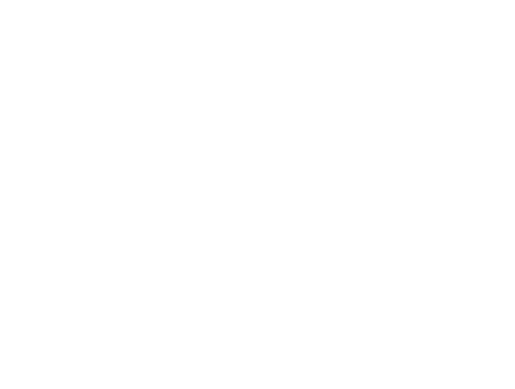

In [11]:
dict_data = get_dict_data(objects, ref, dict_type="name")
model = torch.load("output/poincare_model_dim_3.pt")
coordinates = model["state_dict"]["embedding.weight"].numpy()
# print(model.state_dict()['embedding.weight'])
# coordinates = model.embedding.weight
print(coordinates)
#######################################################
# some experiment with 3d plotting in TF projector
x_np = coordinates # .detach().numpy()
x_df = pd.DataFrame(x_np)
x_df.to_csv(Path('output','tf_proj_vec.tsv'), sep="\t", index=False, header=False)

df = pd.Series(dict_data)
df.to_string()
print(df)
df.to_csv(Path('output','tf_proj_lab.tsv'), sep="\t", index=False, header=False,
          quoting=csv.QUOTE_NONNUMERIC)
# df["index"].map(dictData)
###########################

# print(len(objects))
#print(data)

plt.figure()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')

data, weights, objects, neighbors, diff_summed, num_relations = read_data("data/opehr_concepts.csv")

# add some jitter to better see labels
jitter = 0.02
jitter_x = np.random.uniform(low=-jitter, high = jitter, size=(coordinates.shape[0], ))
jitter_y = np.random.uniform(low=-jitter, high = jitter, size=(coordinates.shape[0], ))

for x in range(coordinates.shape[0]):
    plt.annotate(dict_data[x], (coordinates[x,0].detach().numpy()+jitter_x[x],
                               coordinates[x,1].detach().numpy()+jitter_y[x]), fontsize=4)
    # plt.annotate(dictData[x], (coordinates[x,0]*100, coordinates[x,1]*100),
    #              bbox={"fc":"white", "alpha":0.9}, fontsize=4)

# Plot edges of original hierarchy
for i in range(data.shape[0]):
    x_values = [coordinates[data[i][0], 0].detach().numpy(), coordinates[data[i][1], 0].detach().numpy()]
    y_values = [coordinates[data[i][0], 1].detach().numpy(), coordinates[data[i][1], 1].detach().numpy()]
#
#     x_val = [coordinates[data[x][0],0].detach().numpy(), coordinates[data[x][1],1].detach().numpy()]
#     y_val = [coordinates[data[x][0],0].detach().numpy(), coordinates[data[x][1],1].detach().numpy()]
    plt.plot(x_values, y_values, color="black", linewidth=0.2)

plt.savefig(Path("output", "hierarchy_embed.png"), dpi=300, facecolor="white")
plt.show()